# Download Data

In [ ]:
#@title
!wget "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"

--2022-01-05 15:54:34--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.1’

rows.csv?accessType     [  <=>               ]   1.64G  3.10MB/s    in 9m 32s  

2022-01-05 16:04:08 (2.94 MB/s) - ‘rows.csv?accessType=DOWNLOAD.1’ saved [1762018608]



# Preprocess Data

In [ ]:
#@title
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#@title
data = pd.read_csv('./rows.csv?accessType=DOWNLOAD')

In [ ]:
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465593,12582344,JF100633,12/17/2021 12:00:00 PM,028XX W 25TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1033,10.0,12.0,30.0,06,1157759.0,1887275.0,2021,01/04/2022 03:48:53 PM,41.846437,-87.696523,"(41.846436811, -87.696523392)"
7465594,12583886,JF101794,12/27/2021 11:00:00 AM,011XX E 52ND ST,0890,THEFT,FROM BUILDING,RESIDENCE - PORCH / HALLWAY,False,False,233,2.0,5.0,41.0,06,NaN,NaN,2021,01/04/2022 03:51:23 PM,NaN,NaN,NaN
7465595,12580649,JE492247,12/28/2021 12:42:00 PM,084XX S INGLESIDE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,632,6.0,8.0,44.0,08A,1184022.0,1849325.0,2021,01/04/2022 03:51:23 PM,41.741724,-87.601326,"(41.741724047, -87.60132636)"
7465596,12579318,JE491445,12/28/2021 09:55:00 PM,042XX S ARCHER AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,921,9.0,15.0,58.0,04B,1156622.0,1876206.0,2021,01/04/2022 03:51:23 PM,41.816085,-87.700995,"(41.816085188, -87.700995165)"


In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7465598 entries, 0 to 7465597
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
data.isnull().sum()/ len(data) * 100


ID                      0.000000
Case Number             0.000054
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.118155
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000630
Ward                    8.235616
Community Area          8.217413
FBI Code                0.000000
X Coordinate            1.005840
Y Coordinate            1.005840
Year                    0.000000
Updated On              0.000000
Latitude                1.005840
Longitude               1.005840
Location                1.005840
dtype: float64

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [ ]:
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.OrRd)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    #fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


In [ ]:
plot_counts(data["Primary Type"], "Kind of Crimes")


In [ ]:
plot_counts(data["Location Description"], "Location of Crimes")


In [ ]:
plot_counts(data["Description"], "Description of Crimes")


In [ ]:
aux = data.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4)*100
aux.sort_values('Arrest', inplace=True)
fig = px.bar(
    aux,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    width=1200,
    color_continuous_scale=px.colors.sequential.OrRd

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()


In [ ]:
aux = data.groupby('Primary Type')['Arrest'].mean()#.reset_index()
aux


Primary Type
ARSON                                0.125493
ASSAULT                              0.218927
BATTERY                              0.222731
BURGLARY                             0.057267
CONCEALED CARRY LICENSE VIOLATION    0.966706
CRIM SEXUAL ASSAULT                  0.158553
CRIMINAL DAMAGE                      0.068601
CRIMINAL SEXUAL ASSAULT              0.077656
CRIMINAL TRESPASS                    0.712342
DECEPTIVE PRACTICE                   0.142403
DOMESTIC VIOLENCE                    1.000000
GAMBLING                             0.992743
HOMICIDE                             0.470492
HUMAN TRAFFICKING                    0.073171
INTERFERENCE WITH PUBLIC OFFICER     0.920364
INTIMIDATION                         0.162389
KIDNAPPING                           0.108597
LIQUOR LAW VIOLATION                 0.991462
MOTOR VEHICLE THEFT                  0.087315
NARCOTICS                            0.994179
NON - CRIMINAL                       0.157895
NON-CRIMINAL         

In [ ]:
def describe(DISTRICT=list(sorted(data['District'].unique()))):
    p2=data[data['District']==DISTRICT]['Block']
    global t1
    t1=DISTRICT
    plt.figure(figsize=(10,10))

    sns.countplot(y=p2,data=data,order = p2.value_counts().iloc[:30].index,palette='autumn')
    plt.title('Total crimes in District  ')
    
    plt.show()


In [ ]:
data['Primary Type'].unique()


array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION', 'HOMICIDE',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [ ]:
data['voilent crime']=0
data['other crime']=0
data['sum_voilentcrime']=0

In [ ]:
voilent_crimes=['OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','SEX OFFENSE','NARCOTICS','PROSTITUTION','CRIMINAL DAMAGE','ASSAULT','DOMESTIC VIOLENCE']


In [ ]:
for i in voilent_crimes:
    data.loc[data['Primary Type'] == i, 'voilent crime'] = 1


In [ ]:
other_crimes=['THEFT', 'OTHER OFFENSE',
        'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY']


In [ ]:
for i in other_crimes:
    data.loc[data['Primary Type'] == i, 'other crime'] = 1


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].dt.normalize()


In [ ]:
r1=data['Date']
r1[0]


Timestamp('2015-09-05 00:00:00')

In [ ]:
r2=r1[0]-pd.Timedelta(days=2)
r2


Timestamp('2015-09-03 00:00:00')

In [ ]:
s1=data['Date'].value_counts()
s2=s1.keys()
s3={}
for i in s2:
    r5=[]
    r5.append(i)
    r1=data[data['Date']==i]['voilent crime']==1
    count=0
    for i in r1:
        if i==True:
            count+=1
    s3[r5[0]]=count
    data.loc[data['Date'] == r5[0], 'sum_voilentcrime'] = count


In [ ]:
data['sum_voilentcrime7']=0


In [ ]:
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)
        
    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
            

In [ ]:
l1=0
j=2
while j<8:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0
    
        sum1[s2[i]]+=l1
        
    
    j+=1    

In [ ]:
for i in sum1:
    
    data.loc[data['Date'] == i, 'sum_voilentcrime7'] = sum1[i]

In [ ]:
data['sum_voilentcrime30']=0


In [ ]:
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)
        
    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0

In [ ]:
l1=0
j=2
while j<31:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0
    
        sum1[s2[i]]+=l1
        
    
    j+=1


In [ ]:
for i in sum1:
    
    data.loc[data['Date'] == i, 'sum_voilentcrime30'] = sum1[i]


In [ ]:
data['sum_voilentcrime120']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)
        
    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<121:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0
    
        sum1[s2[i]]+=l1
        
    
    j+=1

In [ ]:
for i in sum1:
    
    data.loc[data['Date'] == i, 'sum_voilentcrime120'] = sum1[i]


In [ ]:
data['sum_othercrime']=0
s1=data['Date'].value_counts()
s2=s1.keys()
s3={}
for i in s2:
    r5=[]
    r5.append(i)
    r1=data[data['Date']==i]['other crime']==1
    count=0
    for i in r1:
        if i==True:
            count+=1
    s3[r5[0]]=count
    data.loc[data['Date'] == r5[0], 'sum_othercrime'] = count


In [ ]:
data['sum_othercrime7']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)
        
    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<8:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0
    
        sum1[s2[i]]+=l1
        
    
    j+=1

In [ ]:
for i in sum1:
    
    data.loc[data['Date'] == i, 'sum_othercrime7'] = sum1[i]

In [ ]:
data['sum_othercrime30']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)
        
    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<31:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0
    
        sum1[s2[i]]+=l1
        
    
    j+=1

In [ ]:
for i in sum1:
    
    data.loc[data['Date'] == i, 'sum_othercrime30'] = sum1[i]


In [ ]:
data['sum_othercrime120']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)
        
    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<121:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0
    
        sum1[s2[i]]+=l1
        
    
    j+=1


In [ ]:
for i in sum1:
    
    data.loc[data['Date'] == i, 'sum_othercrime120'] = sum1[i]

In [ ]:
data["Latitude"].fillna(data["Latitude"].mean(), inplace = True)
data["Longitude"].fillna(data["Longitude"].mean(), inplace = True)


In [ ]:
split_date =data['Date'][77]
df_training = data.loc[data['Date'] <= split_date]
df_test = data.loc[data['Date'] > split_date]

In [ ]:
data['Date'][5898401]


Timestamp('2012-02-20 00:00:00')

In [ ]:
a=len(df_training)
b=len(df_test)
print((a/(a+b))*100)
print((b/(a+b))*100)
a,b,a+b

79.01119240548446
20.98880759451554


(5898658, 1566940, 7465598)

In [ ]:
x_columns=['Latitude','Longitude','sum_voilentcrime7','sum_voilentcrime30','sum_voilentcrime120','sum_othercrime7','sum_othercrime30','sum_othercrime120']

y_columns=['voilent crime']

In [ ]:
x_train=df_training[x_columns]
x_test=df_test[x_columns]
y_train=df_training[y_columns]
y_test=df_test[y_columns]

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)  


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))


0.7453961223786488


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))


[[1167991       0]
 [ 398949       0]]


In [ ]:
data['Date']=pd.to_datetime(data['Date'])


In [ ]:
data.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime,sum_voilentcrime7,sum_voilentcrime30,sum_voilentcrime120,sum_othercrime,sum_othercrime7,sum_othercrime30,sum_othercrime120
7465593,12582344,JF100633,2021-12-17,028XX W 25TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1033,10.0,12.0,30.0,06,1157759.0,1887275.0,2021,01/04/2022 03:48:53 PM,41.846437,-87.696523,"(41.846436811, -87.696523392)",0,1,125,987,3995,17914,402,2927,12554,53496
7465594,12583886,JF101794,2021-12-27,011XX E 52ND ST,0890,THEFT,FROM BUILDING,RESIDENCE - PORCH / HALLWAY,False,False,233,2.0,5.0,41.0,06,NaN,NaN,2021,01/04/2022 03:51:23 PM,41.842060,-87.671617,NaN,0,1,114,742,3877,17502,328,2383,12087,52653
7465595,12580649,JE492247,2021-12-28,084XX S INGLESIDE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,632,6.0,8.0,44.0,08A,1184022.0,1849325.0,2021,01/04/2022 03:51:23 PM,41.741724,-87.601326,"(41.741724047, -87.60132636)",1,0,130,742,3876,17445,275,2331,11999,52510
7465596,12579318,JE491445,2021-12-28,042XX S ARCHER AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,921,9.0,15.0,58.0,04B,1156622.0,1876206.0,2021,01/04/2022 03:51:23 PM,41.816085,-87.700995,"(41.816085188, -87.700995165)",0,1,130,742,3876,17445,275,2331,11999,52510
7465597,12578946,JE490926,2021-12-28,076XX S PHILLIPS AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,421,4.0,7.0,43.0,08A,1193859.0,1854712.0,2021,01/04/2022 03:51:23 PM,41.756271,-87.565108,"(41.756271144, -87.565108328)",1,0,130,742,3876,17445,275,2331,11999,52510


In [ ]:
data.index= pd.DatetimeIndex(data.Date)
data.index = pd.to_datetime(data.index)

In [ ]:
data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])


In [ ]:
data['Primary Type']


Date
2015-09-05      BATTERY
2015-09-04        THEFT
2018-09-01        THEFT
2015-09-05    NARCOTICS
2015-09-05      ASSAULT
                ...    
2021-12-17        THEFT
2021-12-27        THEFT
2021-12-28      ASSAULT
2021-12-28      BATTERY
2021-12-28      ASSAULT
Name: Primary Type, Length: 7465598, dtype: category
Categories (36, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE',
                          'STALKING', 'THEFT', 'WEAPONS VIOLATION']

In [ ]:
data.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime,sum_voilentcrime7,sum_voilentcrime30,sum_voilentcrime120,sum_othercrime,sum_othercrime7,sum_othercrime30,sum_othercrime120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-17,12582344,JF100633,2021-12-17,028XX W 25TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1033,10.0,12.0,30.0,06,1157759.0,1887275.0,2021,01/04/2022 03:48:53 PM,41.846437,-87.696523,"(41.846436811, -87.696523392)",0,1,125,987,3995,17914,402,2927,12554,53496
2021-12-27,12583886,JF101794,2021-12-27,011XX E 52ND ST,0890,THEFT,FROM BUILDING,RESIDENCE - PORCH / HALLWAY,False,False,233,2.0,5.0,41.0,06,NaN,NaN,2021,01/04/2022 03:51:23 PM,41.842060,-87.671617,NaN,0,1,114,742,3877,17502,328,2383,12087,52653
2021-12-28,12580649,JE492247,2021-12-28,084XX S INGLESIDE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,632,6.0,8.0,44.0,08A,1184022.0,1849325.0,2021,01/04/2022 03:51:23 PM,41.741724,-87.601326,"(41.741724047, -87.60132636)",1,0,130,742,3876,17445,275,2331,11999,52510
2021-12-28,12579318,JE491445,2021-12-28,042XX S ARCHER AVE,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,921,9.0,15.0,58.0,04B,1156622.0,1876206.0,2021,01/04/2022 03:51:23 PM,41.816085,-87.700995,"(41.816085188, -87.700995165)",0,1,130,742,3876,17445,275,2331,11999,52510
2021-12-28,12578946,JE490926,2021-12-28,076XX S PHILLIPS AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,421,4.0,7.0,43.0,08A,1193859.0,1854712.0,2021,01/04/2022 03:51:23 PM,41.756271,-87.565108,"(41.756271144, -87.565108328)",1,0,130,742,3876,17445,275,2331,11999,52510


In [ ]:
import numpy as np 

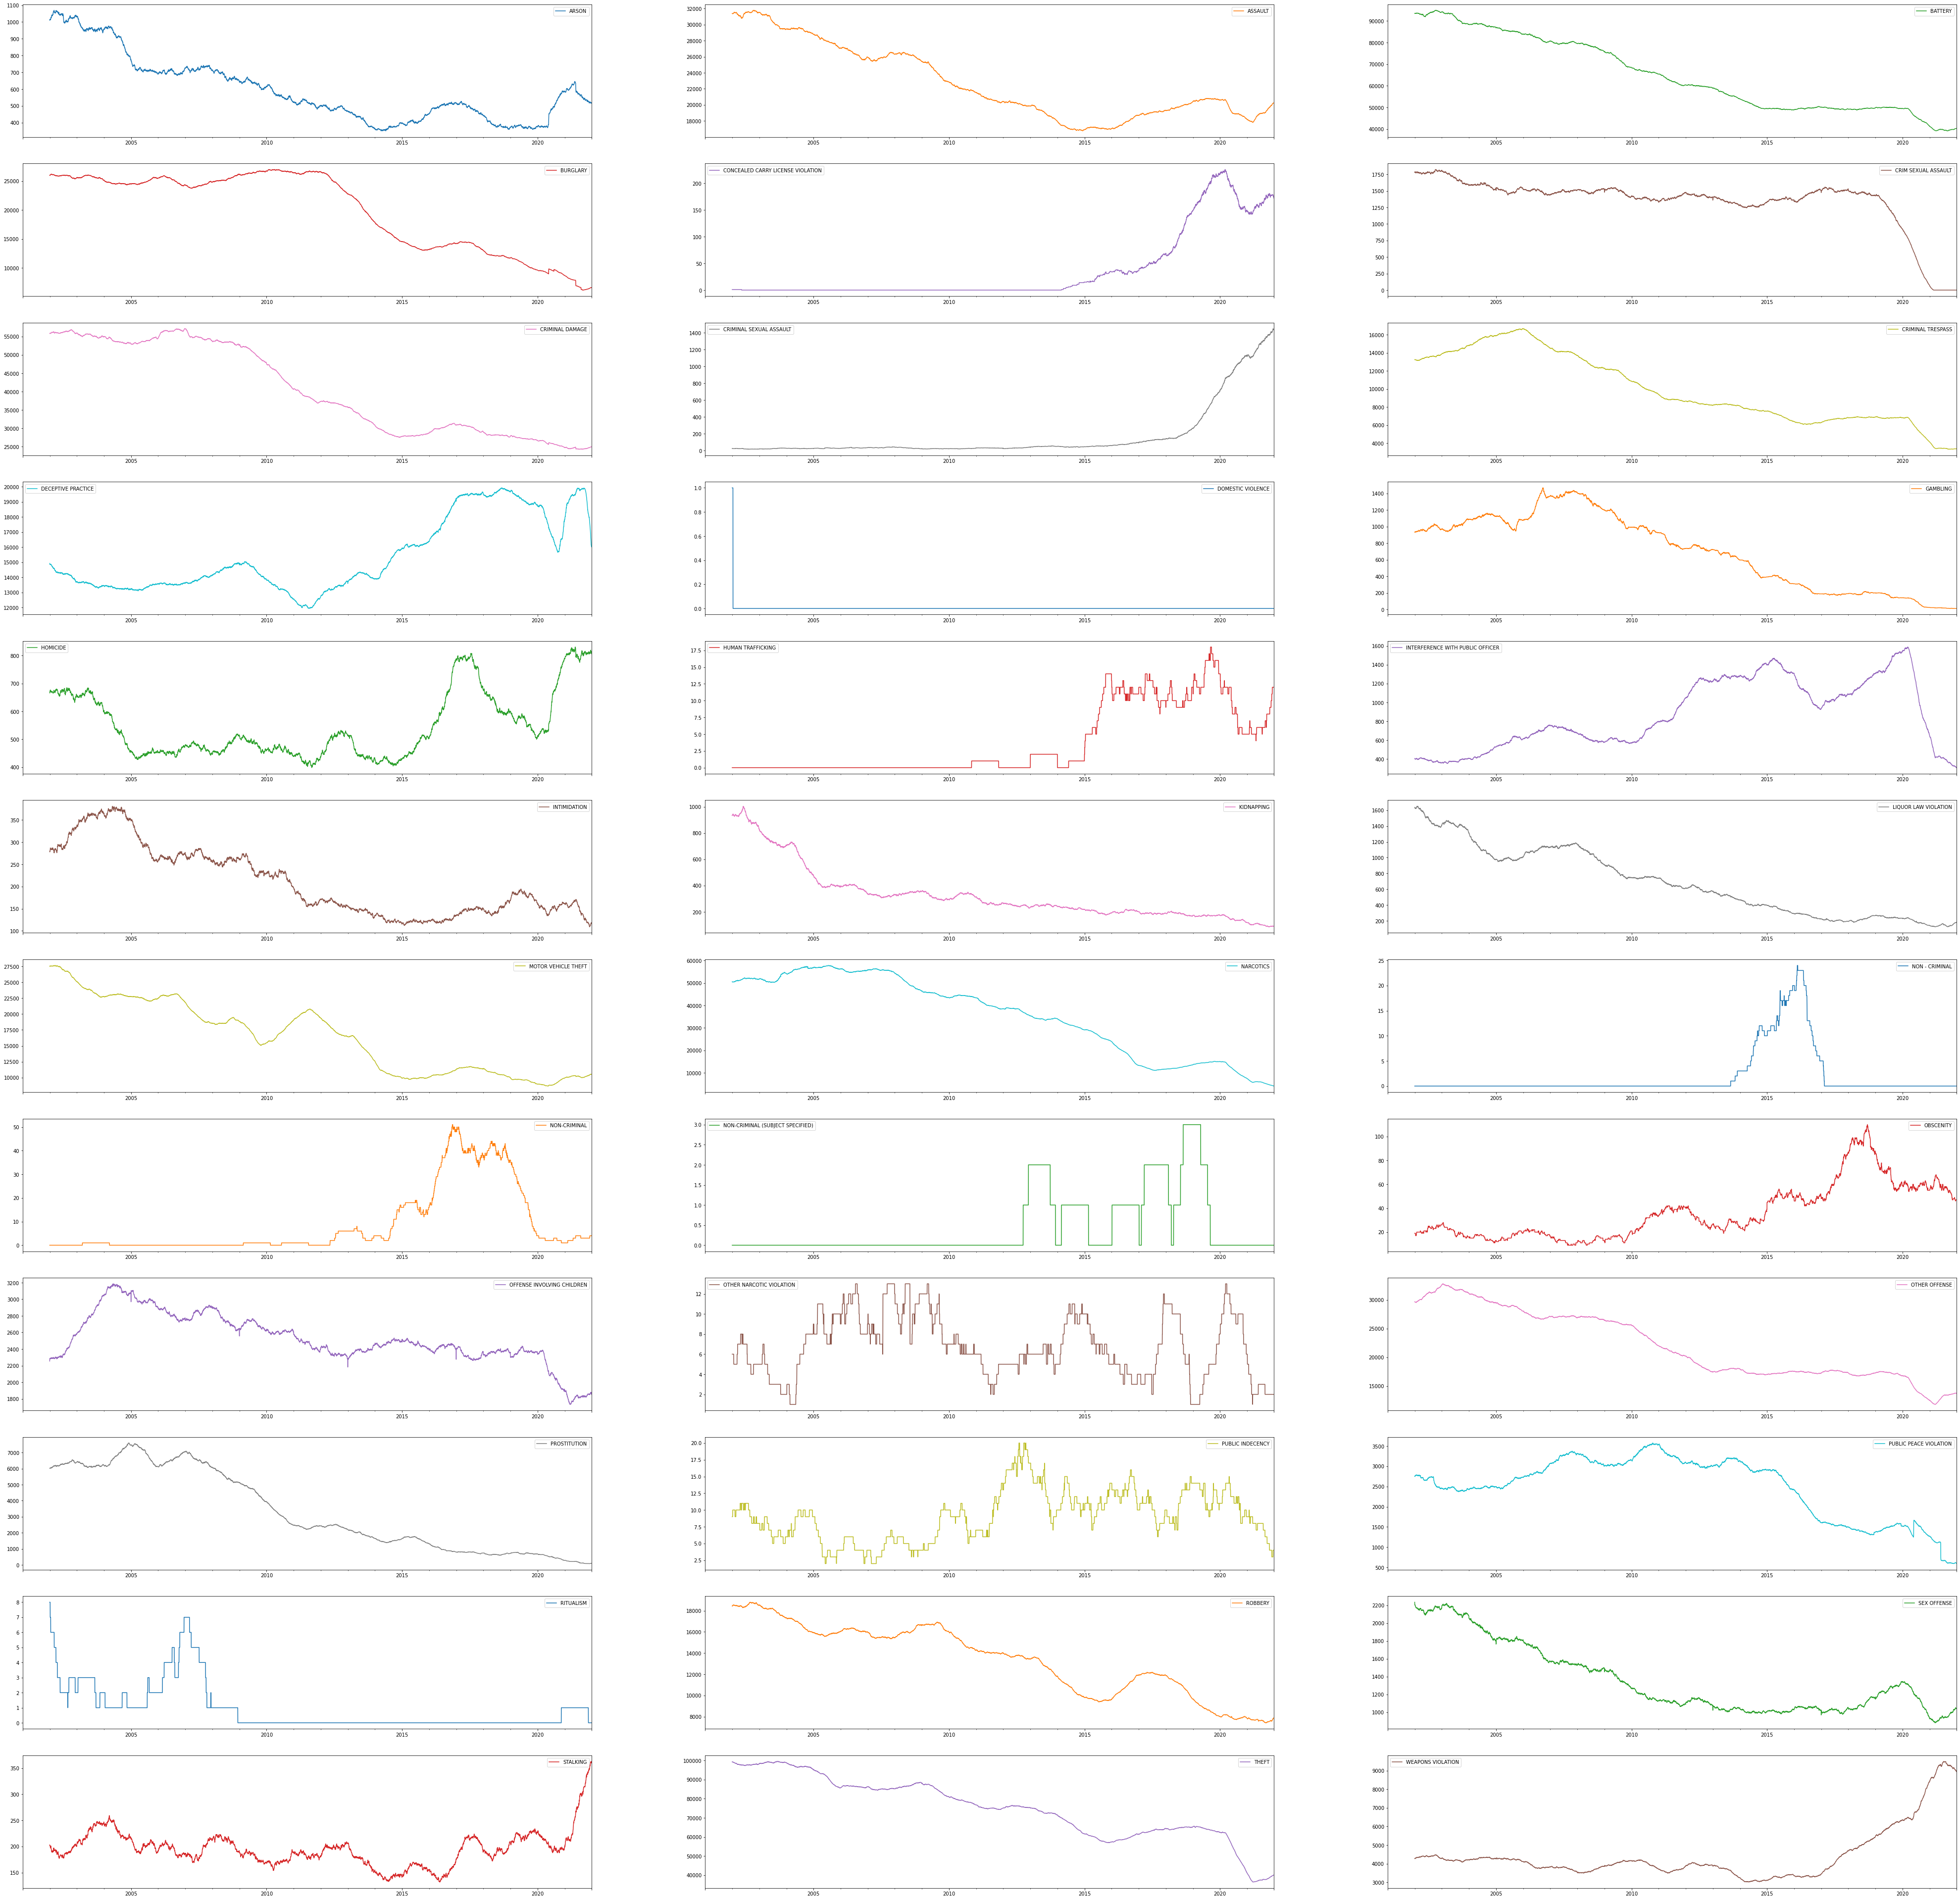

In [ ]:
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(70, 70), subplots=True, layout=(-1, 3), sharex=False, sharey=False)


Here we drop the unnecessary features (columns)

In [ ]:
#@title
data.drop(['ID', 'Case Number', 'IUCR', 'Description', 'Arrest', 'FBI Code', 'Latitude','Longitude', 'Location', 'Updated On', 'Date', 'X Coordinate', 'Y Coordinate', 'Domestic'],axis=1, inplace=True)

In [ ]:
#@title
display(data)

,Block,Primary Type,Location Description,Beat,District,Ward,Community Area,Year
0,043XX S WOOD ST,BATTERY,RESIDENCE,924,9.0,12.0,61.0,2015
1,008XX N CENTRAL AVE,THEFT,CTA BUS,1511,15.0,29.0,25.0,2015
2,082XX S INGLESIDE AVE,THEFT,RESIDENCE,631,6.0,8.0,44.0,2018
3,035XX W BARRY AVE,NARCOTICS,SIDEWALK,1412,14.0,35.0,21.0,2015
4,0000X N LARAMIE AVE,ASSAULT,APARTMENT,1522,15.0,28.0,25.0,2015
...,...,...,...,...,...,...,...,...
7277761,077XX S STEWART AVE,OTHER OFFENSE,RESIDENCE,623,6.0,17.0,69.0,2021
7277762,127XX S WALLACE ST,CONCEALED CARRY LICENSE VIOLATION,STREET,523,5.0,9.0,53.0,2021
7277763,024XX W HUTCHINSON ST,DECEPTIVE PRACTICE,RESIDENCE,1911,19.0,47.0,5.0,2021
7277764,014XX N MILWAUKEE AVE,ROBBERY,STREET,1424,14.0,1.0,24.0,2021


In [ ]:
#@title
X = data.copy()

Some values in the location description are filled with 'Nan', so here we create a new value and name it 'Others'. to replace the 'NaN'

In [ ]:
#@title
X['Location Description'].fillna('Others', inplace=True)

In [ ]:
#@title
X.shape

(7277766, 8)

## Feature Engineering

In this section, we will reduce the number of types and group them into smaller number of categories

Here we check how many type we have

In [ ]:
#@title
X['Primary Type'].value_counts()

THEFT                                1533912
BATTERY                              1332720
CRIMINAL DAMAGE                       828504
NARCOTICS                             736340
ASSAULT                               461546
OTHER OFFENSE                         451443
BURGLARY                              408489
MOTOR VEHICLE THEFT                   335420
DECEPTIVE PRACTICE                    307184
ROBBERY                               273645
CRIMINAL TRESPASS                     205531
WEAPONS VIOLATION                      86957
PROSTITUTION                           69379
PUBLIC PEACE VIOLATION                 50822
OFFENSE INVOLVING CHILDREN             50615
CRIM SEXUAL ASSAULT                    27977
SEX OFFENSE                            27833
INTERFERENCE WITH PUBLIC OFFICER       17538
GAMBLING                               14594
LIQUOR LAW VIOLATION                   14464
ARSON                                  12202
HOMICIDE                               10895
KIDNAPPING

Here we create a dictionary to categorize the crime types into smaller categories as all of the types in the dictionary's values will be replaced by the corresponding key value.

In [ ]:
#@title
categories = {
    'forbidden practices':['narcotics', 'prostitution', 'gambling', 'obscenity',
                           'narcotic violation'],
    'theft': ['burglary', 'deceptive practice', 'motor vehicle theft', 'robbery'],
    'assault': ['crime sexual assault', 'offense involving children', 'sex offense',
               'homicide', 'human trafficking', 'criminal sexual assault', 'assault'],
    'public peace violation' : ['weapons violation', 'criminal defacement',
                                'criminal trespass', 'arson', 'kidnapping',
                                'stalking','intimidation', 'public indecency']
}

In [ ]:
#@title
for category in categories:
  X['Primary Type'].replace([x.upper() for x in categories[category]], category.upper(), inplace=True)

Now we check the new types in the dataset

In [ ]:
#@title
X['Primary Type'].value_counts()

THEFT                                2858650
BATTERY                              1332720
CRIMINAL DAMAGE                       828504
FORBIDDEN PRACTICES                   821020
ASSAULT                               553545
OTHER OFFENSE                         451443
PUBLIC PEACE VIOLATION                370838
CRIM SEXUAL ASSAULT                    27977
INTERFERENCE WITH PUBLIC OFFICER       17538
LIQUOR LAW VIOLATION                   14464
CONCEALED CARRY LICENSE VIOLATION        685
NON-CRIMINAL                             172
OTHER NARCOTIC VIOLATION                 138
NON - CRIMINAL                            38
RITUALISM                                 24
NON-CRIMINAL (SUBJECT SPECIFIED)           9
DOMESTIC VIOLENCE                          1
Name: Primary Type, dtype: int64

Here we are useing a LabelEncoder to encode the data. It replaces string values with numerical values.

In [ ]:
#@title
columns_to_encode = ['Block', 'Location Description', 'District', 'Ward', 'Community Area', 'Year', 'Primary Type']
for column in columns_to_encode:
  X[column] = LabelEncoder().fit_transform(X[column])

Here we see the dataset after encoding

In [ ]:
#@title
display(X)

,Block,Primary Type,Location Description,Beat,District,Ward,Community Area,Year
0,35352,1,159,924,8,11,61,14
1,7846,16,68,1511,13,28,25,14
2,54256,16,159,631,5,7,44,17
3,30350,6,182,1412,12,34,21,14
4,427,0,17,1522,13,27,25,14
...,...,...,...,...,...,...,...,...
7277761,52873,13,159,623,5,16,69,20
7277762,60977,2,187,523,4,8,53,20
7277763,22038,16,159,1911,17,46,5,20
7277764,13059,16,187,1424,12,0,24,20


Here we choose our target variable (the onne we want to predict) and drop it from the dataset

In [ ]:
#@title
y = X['Primary Type']

In [ ]:
#@title
X.drop(['Primary Type'],axis=1, inplace=True)

Here we decide the data into train and test set

In [ ]:
#@title
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here we initiate a random forest classfier. the n_estimators hyper-parameter coresspondes to the number of trees in the forest.

**Feel free to increase it and test the accuracy**

In [ ]:
#@title
clf = RandomForestClassifier(n_estimators=7, criterion='entropy')

Here we do the training and test the accuracy

In [ ]:
#@title
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#@title
y_pred = clf.predict(X_test)

In [ ]:
#@title
accuracy = accuracy_score(y_pred, y_test)

In [ ]:
#@title
accuracy

0.39368258577494014